In [3]:
import numpy as np 
import pandas as pd 
import pandas_datareader as data 
import matplotlib.pyplot as plt
import pickle


In [4]:
start = '2012-01-01'
end = '2022-02-28'
df = data.DataReader('AAPL', 'yahoo', start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643503
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783871
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021


In [5]:
df = df.reset_index()

In [6]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643503
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783871
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021


In [7]:
df = df.drop(['Adj Close', 'Date'], axis=1)

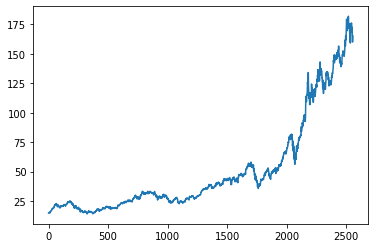

In [8]:
plt.plot(df.Close)

In [9]:
weekma = df.Close.rolling(100).mean()

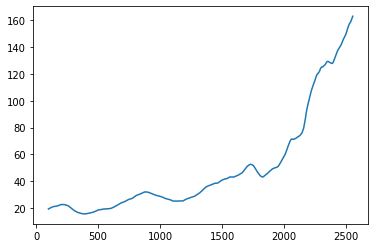

In [10]:
plt.plot(weekma)

In [11]:
df.shape

(2556, 5)

In [12]:
#Splitting into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1789, 1)
(767, 1)


In [13]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [14]:
data_testing.tail()

,Close
2551,164.320007
2552,160.070007
2553,162.740005
2554,164.850006
2555,165.119995


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.65021556],
       [0.64465616],
       [0.65293847]])

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(1689, 100, 1)

In [19]:
y_train.shape

(1689,)

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2022-03-30 14:41:04.018717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-30 14:41:04.018752: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

2022-03-30 14:41:11.503062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-30 14:41:11.503095: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 14:41:11.503113: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (savitar): /proc/driver/nvidia/version does not exist
2022-03-30 14:41:11.503356: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
53/53 [==============================] - 12s 168ms/step - loss: 0.0324
Epoch 2/100
53/53 [==============================] - 9s 170ms/step - loss: 0.0069
Epoch 3/100
53/53 [==============================] - 9s 169ms/step - loss: 0.0053
Epoch 4/100
53/53 [==============================] - 9s 171ms/step - loss: 0.0054
Epoch 5/100
53/53 [==============================] - 9s 171ms/step - loss: 0.0054
Epoch 6/100
53/53 [==============================] - 9s 178ms/step - loss: 0.0049
Epoch 7/100
53/53 [==============================] - 9s 170ms/step - loss: 0.0050
Epoch 8/100
53/53 [==============================] - 9s 162ms/step - loss: 0.0051
Epoch 9/100
53/53 [==============================] - 9s 166ms/step - loss: 0.0043
Epoch 10/100
53/53 [==============================] - 9s 167ms/step - loss: 0.0047
Epoch 11/100
53/53 [==============================] - 9s 169ms/step - loss: 0.0042
Epoch 12/100
53/53 [==============================] - 9s 164ms/step - loss: 0.0045
Epoch 13/100

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("../models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("../models/model.h5")
print("Saved model to disk")

Saved model to disk


In [46]:
model.save('../models/keras_model.h5')

In [30]:
data_testing.head()

,Close
1789,42.544998
1790,42.700001
1791,42.605000
1792,42.732498
1793,43.007500


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

/tmp/ipykernel_8678/1946111053.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


,Close
0,54.592499
1,55.007500
2,54.415001
3,55.197498
4,55.547501


In [33]:
inputs = scaler.transform(final_df)
inputs

array([[0.92228267],
       [0.93169952],
       [0.91825503],
       [0.93601081],
       [0.94395278],
       [0.93391191],
       [0.95960965],
       [0.96409121],
       [0.97271379],
       [0.98417286],
       [1.        ],
       [0.97685499],
       [0.95586559],
       [0.9529158 ],
       [0.97050141],
       [0.91088038],
       [0.90004533],
       [0.94349894],
       [0.91655318],
       [0.94372582],
       [0.93827998],
       [0.90895165],
       [0.9276151 ],
       [0.93521663],
       [0.94701605],
       [0.90367591],
       [0.9303948 ],
       [0.91054003],
       [0.8875085 ],
       [0.89352165],
       [0.92506237],
       [0.94412295],
       [0.86050595],
       [0.8270932 ],
       [0.83945994],
       [0.87451776],
       [0.86623553],
       [0.84343088],
       [0.78500109],
       [0.77399586],
       [0.74319263],
       [0.76934421],
       [0.78137051],
       [0.73786019],
       [0.68748576],
       [0.68635122],
       [0.66088035],
       [0.674

In [34]:
inputs.shape

(867, 1)

In [35]:
x_test = [] 
y_test = []

for i in range(100, (inputs.shape[0])):
    x_test.append(inputs[i-100: i])
    y_test.append(inputs[i,0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(767, 100, 1)
(767,)


In [37]:
y_predicted = (model.predict(x_test)) 

In [38]:
y_predicted.shape

(767, 1)

In [39]:
scaler.scale_

array([0.02269117])

In [40]:
scale = 1/0.0378916
scale 

26.391073483305007

In [41]:
y_predicted = scale * y_predicted
y_test = scale * y_test

In [42]:
y_test.shape

(767,)

In [43]:
y_predicted.shape

(767, 1)

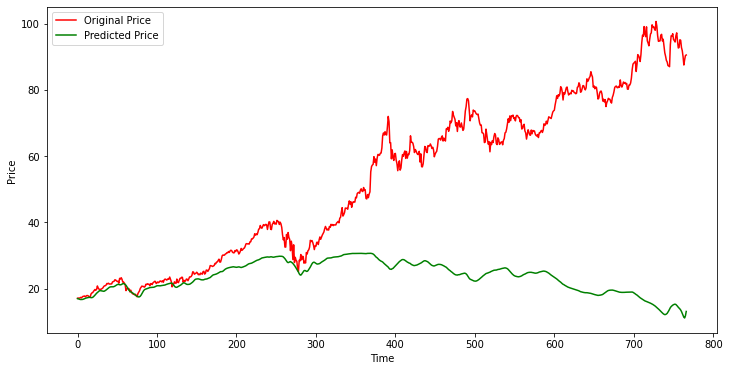

In [44]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()